In [46]:
import os
import sys
import numpy as np
import json
import matplotlib.pyplot as plt
import mdtraj
import urllib.request
import yaml

sys.path.insert(1, '../BuildDatabank/')
from databankLibrary import download_link, lipids_dict, molecule_numbers_dict
    
class databank():
    
    def __init__(self,path=r'../../Data/Simulations/'):
        self.path = path
        self.systems = []
        self.__load_systems__(path)

    def __load_systems__(self,path):
        for subdir, dirs, files in os.walk(path):
            for filename in files:
                filepath = os.path.join(subdir, filename)
                #print(filepath)
                if filename == "README.yaml":
                    with open(filepath) as yaml_file:
                        content = yaml.load(yaml_file, Loader=yaml.FullLoader)
                        content['path'] = filepath
                        self.systems.append(content)
                
    def get_systems(self):
        return self.systems
    
    def pie_temperature(self):
        list_feature = [ int(float(system['TEMPERATURE'])) for system in self.systems]
        import collections
        counter = collections.Counter(list_feature)
        plt.pie(counter.values(),labels=counter.keys(), normalize=True)


In [28]:
path = '../../Data/Simulations/'
db_data = databank(path)
systems = db_data.get_systems()

Number of entries:  107
Total size of trajectories:  293.58542147278786 Gb
Total time of trajectories:  35073.244999999995 ns


Text(0,0.5,'Distribution')

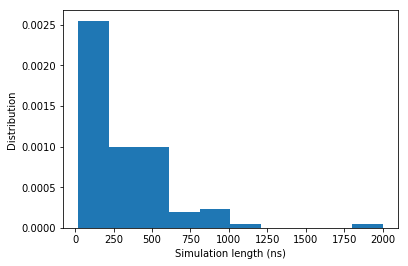

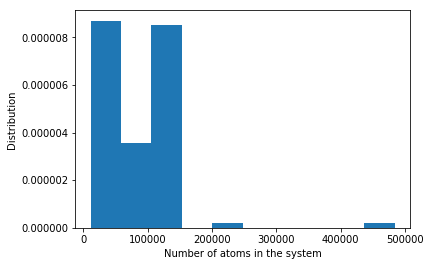

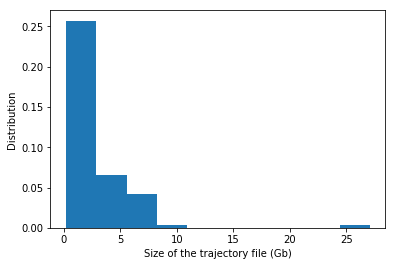

In [44]:
SimulationLengths = []
NumberOfAtoms = []
SizeOfTrajectories = []

for system in systems:
    SimulationLengths.append(system['TRJLENGTH']*0.001)
    NumberOfAtoms.append(system['NUMBER_OF_ATOMS'])
    SizeOfTrajectories.append(system['TRAJECTORY_SIZE']/(1024*1024*1024))
    
print("Number of entries: ",len(systems))
print("Total size of trajectories: ",str(np.sum(SizeOfTrajectories)) + ' Gb')
print("Total time of trajectories: ",str(np.sum(SimulationLengths)) + ' ns')

distSIMl = plt.hist(SimulationLengths, density=True)
plt.xlabel('Simulation length (ns)')
plt.ylabel('Distribution')
plt.figure()
distNatoms = plt.hist(NumberOfAtoms, density=True)
plt.xlabel('Number of atoms in the system')
plt.ylabel('Distribution')
plt.figure()
disttrjSIZE = plt.hist(SizeOfTrajectories, density=True)
plt.xlabel('Size of the trajectory file (Gb)')
plt.ylabel('Distribution')

In [64]:
for system in systems:
    for lipid in lipids_dict:
        try:
            if np.sum(system['N' + lipid]) > 0: 
                print(np.sum(system['N' + lipid]))
        except:
            print()








30

100







72









512


512









72






50


250
512





80



80









128





150



150
126
374








128
512








200








200





128



128





128



128


50

250








500
126
374








200






50


250





88



350




512
100








100









256





88



350









500








128





24




100
200



200









72





128



128








72









128
512





150



150


150

150
144



512
512








72





88



350







44

100


500










128
512





80



80
46





180
16


14







150



150






22


110









128





150



350





100



400





128



128









128






128








50



250



800








200








72





36



84








88

100





250



250
512




512









256
200











72




200








72





128



128


50

250






22


110






128







80




80






22


110





250



250


118




500






88



350





32


128

512





150

In [25]:
systems = db_data.get_systems()
systems

[{'CAL': 'CA',
  'CHOL': 'CHOL',
  'CLA': 'CLA',
  'DATEOFRUNNING': '12/05/2021',
  'DHMDMAB': 'T7H',
  'DIR_WRK': '/media/osollila/Data/tmp/DATABANK/',
  'DOI': '10.5281/zenodo.1288297',
  'EXPERIMENT': {},
  'FF': 'CHARMM36',
  'FF_DATE': '??',
  'FF_SOURCE': 'NMRlipids IVa',
  'MAPPING_DICT': {'CLA': 'mappingCLA.txt',
   'DHMDMAB': 'mappingDHMDMABcharmm.txt',
   'POPC': 'mappingPOPCcharmm.txt',
   'SOL': 'mappingTIP3PCHARMMgui.txt'},
  'NCAL': 0,
  'NCHOL': [0, 0],
  'NCLA': 30,
  'NDHMDMAB': [15, 15],
  'NDMPC': [0, 0],
  'NDPPC': [0, 0],
  'NPOPC': [50, 50],
  'NPOPE': [0, 0],
  'NPOPG': [0, 0],
  'NPOPI': [0, 0],
  'NPOPS': [0, 0],
  'NPOT': 0,
  'NSAPI': [0, 0],
  'NSLPI': [0, 0],
  'NSOD': 0,
  'NSOL': 7966,
  'NUMBER_OF_ATOMS': 40538,
  'POPC': 'POPC',
  'POPE': 'POPE',
  'POPG': 'POPG',
  'POPS': 'POPS',
  'POT': 'K',
  'PREEQTIME': 0,
  'SOD': 'NA',
  'SOFTWARE': 'gromacs',
  'SOL': 'TIP3',
  'SYSTEM': 'POPC20%DHMDMAB_T313K',
  'TEMPERATURE': '313',
  'TIMELEFTOUT': 20,
  'T

In [207]:
for system in systems:
    for feature in system.items():
        if "PC" in feature[0]:
            if feature[0][0] != 0:
                print(f"{feature} in {system['path']}\n")
    print(system)
    break
        

('POPC', 'POPC') in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

('NPOPC', [125, 125]) in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

('NDMPC', [0, 0]) in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

('NDPPC', [0, 0]) in ../../Data/Simulations/6e5/059/6e50598ebc47c6e57f6d242896be41b8a18de9a6/1c4ab02a568cca02b0eedbdc6c52ea136c2f3c40/README.yaml

{'DOI': '10.5281/zenodo.3483787', 'SOFTWARE': 'gromacs', 'TRJ': [['run.wrapped.xtc']], 'TPR': [['step7_1.tpr']], 'PREEQTIME': 0, 'TIMELEFTOUT': 0, 'POPC': 'POPC', 'POPG': 'POPG', 'SOL': 'TIP3', 'POT': 'POT', 'MAPPING_DICT': {'POPC': 'mappingPOPCcharmm.txt', 'POPG': 'mappingPOPGcharmm.txt', 'SOL': 'mappingTIP3PCHARMMgui.txt', 'POT': 'mappingPOT.txt'}, 'DIR_WRK': '/usr/home/bort/Databank', 'PUBLICATION': Non

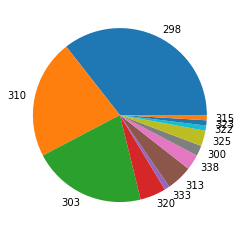

In [202]:
db_data.pie_temperature()

In [97]:
temps = [ int(float(system['TEMPERATURE'])) for system in systems]

TypeError: 'databank' object is not iterable

In [ ]:
import collections
counter = collections.Counter(temps)
plt.pie(counter.values(),labels=counter.keys());

In [ ]:

lipids = [PC,PG, PS, PE, PI]
